# Machine Translation (MT) Evaluation

<font color='red'>***This is the reference for the metrics with sample code to calculate them. Actual metrics are ther in the model notebooks***</font>

Effectiveness of the Machine Translation mainly determined by adequacy & fluency

- **Adequacy** is a measure to know if all the meaning was expressed from source language to the target language
- **Fluency** measures how grammatically well-formed the sentences are along with ease of interpretation

Some of the famous automated Metrics for MT Evaluation **BLEU, METEOR, ROUGE, CIDER & SPICE**

It has been shown that BLEU & METEOR scores correlate well with the human judgment of translation quality

**Disadvantages of automatic metrics**

Current metrics are still relatively crude, do not distinguish well between subtle differences in systems
Individual sentence scores are often not very reliable, aggregate scores on a large test set are more stable

**Some of the packages to calculate the BLEU, METEOR, ROUGE metrics**

[Evaluate](https://huggingface.co/spaces/evaluate-metric/bleu)

[Trouch Metrics](https://torchmetrics.readthedocs.io/en/stable/text/rouge_score.html)

[NLTK](https://www.nltk.org/api/nltk.translate.meteor_score.html?highlight=meteor#module-nltk.translate.meteor_score)

In [12]:
! pip install rouge_score
! pip install evaluate
! pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import evaluate
from torchmetrics.functional.text.rouge import rouge_score
from nltk.translate.meteor_score import meteor_score
import nltk
import numpy as np

from pprint import pprint

# BLEU (Bilingual Evaluation Understudy)

BLEU (BiLingual Evaluation Understudy) is a metric for automatically evaluating machine-translated text. The BLEU score is a number between zero and one that measures the similarity of the machine-translated text to a set of high-quality reference translations. A value of 0 means that the machine-translated output has no overlap with the reference translation (low quality) while a value of 1 means there is perfect overlap with the reference translations (high quality).

**BLEU is a Corpus-based Metric**. Instead of averaging the sentence level BLEU scores (i.e. macro-average
precision), the original BLEU metric (Papineni et al. 2002) accounts for the micro-average precision (i.e. summing the numerators and denominators for each hypothesis-reference(s) pairs before the division. The BLEU metric performs badly when used to evaluate individual sentences

BLEU score is more precision based than recalled. In other words, it is based on evaluating whether all words in the generated candidate are in the reference that a manual evaluator comes up with. But it does not check if all words in reference are covered!

| **BLEU Score** |                     **Interpretation**                    |
|:--------------:|:---------------------------------------------------------:|
| **< 10**       | Almost useless                                            |
| **10 - 19**    | Hard to get the gist                                      |
| **20 - 29**    | The gist is clear, but has significant grammatical errors |
| **30 - 40**    | Understandable to good translations                       |
| **40 - 50**    | High-quality translations                                 |
| **50 - 60**    | Very high quality, adequate, and fluent translations      |
| **> 60**       | Quality often better than human                           |

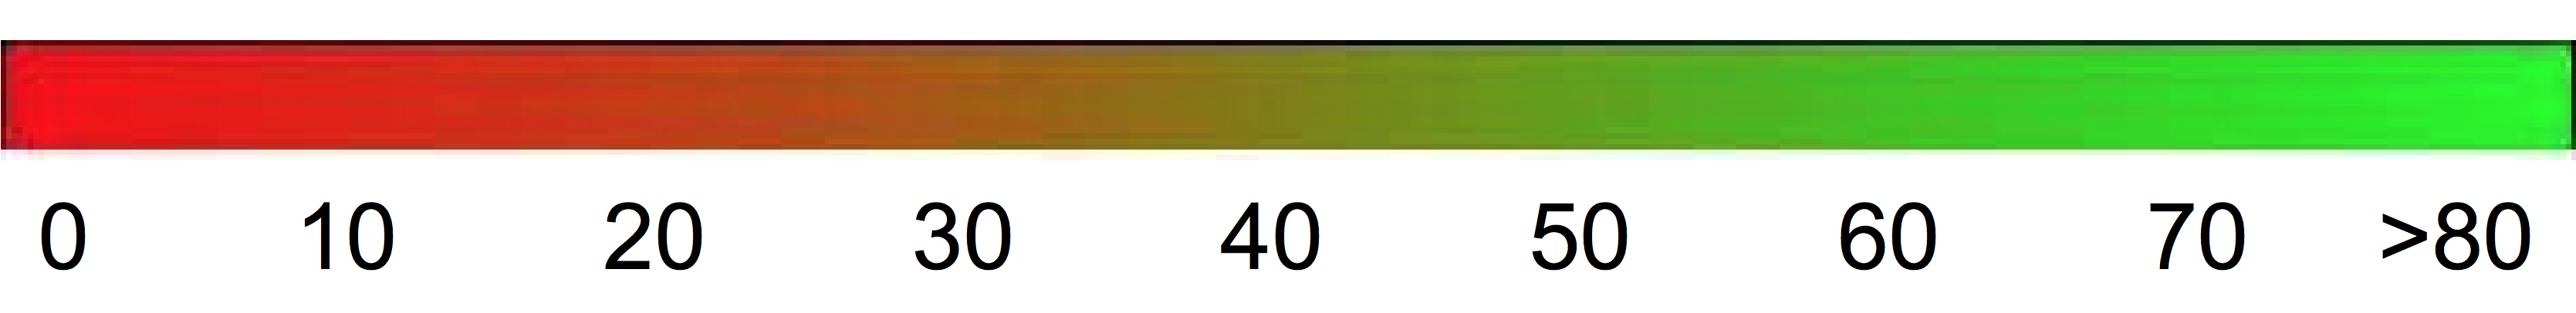

In [14]:
predictions = [
                "hello there general kenobi",
                "foo bar foobar"
            ]
references = [
                ["hello there general kenobi", "hello there!"], # 1st prediction has 2 references
                ["foo bar foobar"]
            ]

bleu = evaluate.load("bleu")
results = bleu.compute(predictions=predictions, references=references)
pprint(results)

{'bleu': 1.0,
 'brevity_penalty': 1.0,
 'length_ratio': 1.1666666666666667,
 'precisions': [1.0, 1.0, 1.0, 1.0],
 'reference_length': 6,
 'translation_length': 7}


# METEOR (Metric for Evaluation of Translation with Explicit ORdering)

The METEOR metric is designed to address some of the deficiencies inherent in the BLEU metric. The metric is based on the weighted harmonic mean of unigram precision and unigram recall

METEOR also includes some other features not found in other metrics, such as synonymy matching, where instead of matching only on the exact word form, the metric also matches on synonyms. For example, the word "good" in the reference rendering as "well" in the translation counts as a match. The metric is also includes a stemmer, which lemmatises words and matches on the lemmatised forms

## Single reference support (Evaluate)

In [15]:
predictions = [
                "hello there general kenobi",
                "foo bar foobar"
            ]
references = [ # supports only single reference
                "hello there general kenobi",
                "foo bar foobar"
            ]

bleu = evaluate.load("meteor")
results = bleu.compute(predictions=predictions, references=references)
pprint(results)

{'meteor': 0.9868344907407407}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Mutiple references support (NLTK)



**It doesn't support score for entire corpus**

In [16]:
# Input should be tokenized before passing to this
predictions = [
                "hello", "there", "general", "kenobi"
            ]
references = [  # supports mutiple references
                ["hello", "there", "general", "kenobi"],
                ["hello", "there!"]
            ]

results = meteor_score(references=references, hypothesis=predictions)
pprint(results)

0.9921875


## Avg. METEOR score for entire Corpus

In [17]:
def corpus_meteor(corpus_predictions, corpus_references):
    '''
        corpus_predictions: list of prediction strings
        corpus_references: list of list reference strings
    '''

    corpus_meteor_score = []
    for (references, prediction) in zip(corpus_references, corpus_predictions):
        references = [nltk.word_tokenize(reference) for reference in references]
        prediction = nltk.word_tokenize(prediction)
        corpus_meteor_score.append(meteor_score(references, prediction))

    corpus_meteor_score = np.mean(np.array(corpus_meteor_score))
    return corpus_meteor_score

predictions = [
                "hello there general kenobi",
                "foo bar foobar"
            ]
references = [  # supports mutiple references
                ["hello there general kenobi", "hello there!"], # 1st prediction has 2 references
                ["foo bar foobar"]
            ]

results = corpus_meteor(predictions, references)
pprint(results)

0.9868344907407407


# ROUGE (Recall-Oriented Understudy for Gisting Evaluation)

ROUGE doesn't try to assess how fluent the summary: ROUGE only tries to assess the adequacy, by simply counting how many n-grams in your generated summary matches the n-grams in your reference summary (or summaries, as ROUGE supports multi-reference corpora).

Note that ROUGE is similar to the BLEU measure for machine translation, but BLEU is precision- based

* ROUGE-n recall=40% means that 40% of the n-grams in the reference summary are also present in the generated summary.
* ROUGE-n precision=40% means that 40% of the n-grams in the generated summary are also present in the reference summary.



## Single reference support (Evaluate)

In [18]:
predictions = [
                "hello there general kenobi",
                "foo bar foobar"
            ]
references = [  # supports only single reference
                "hello there general kenobi",
                "foo bar foobar"
            ]

bleu = evaluate.load("rouge")
results = bleu.compute(predictions=predictions, references=references)
pprint(results)

{'rouge1': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rouge2': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rougeL': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)),
 'rougeLsum': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0))}


## Mutiple references support (TorchMetrics)

In [19]:
predictions = [
                "hello there general kenobi",
                "foo bar foobar"
            ]
references = [  # supports mutiple references
                ["hello there general kenobi", "hello there!"], # 1st prediction has 2 references
                ["foo bar foobar"]
            ]

results = rouge_score(predictions, references)
pprint(results)

{'rouge1_fmeasure': tensor(1.),
 'rouge1_precision': tensor(1.),
 'rouge1_recall': tensor(1.),
 'rouge2_fmeasure': tensor(1.),
 'rouge2_precision': tensor(1.),
 'rouge2_recall': tensor(1.),
 'rougeL_fmeasure': tensor(1.),
 'rougeL_precision': tensor(1.),
 'rougeL_recall': tensor(1.),
 'rougeLsum_fmeasure': tensor(1.),
 'rougeLsum_precision': tensor(1.),
 'rougeLsum_recall': tensor(1.)}


We have some more modren evalutation metrics like **CIDER and SPICE**. But calculating them is time consuming. We have to use java for same

https://github.com/vrama91/cider

https://panderson.me/spice/

# Code to integrate with project

In [20]:
! pip install rouge_score
! pip install evaluate
! pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import evaluate
from torchmetrics.functional.text.rouge import rouge_score
from nltk.translate.meteor_score import meteor_score
import nltk
import numpy as np

from pprint import pprint


In [22]:
# BLEU

def corpus_bleu(corpus_predictions, corpus_references):
    '''
        corpus_predictions: list of prediction strings
        corpus_references: list of list reference strings
    '''

    bleu = evaluate.load("bleu")
    results = bleu.compute(predictions=corpus_predictions, references=corpus_references)

    return results

# METEOR
def corpus_meteor(corpus_predictions, corpus_references):
    '''
        corpus_predictions: list of prediction strings
        corpus_references: list of list reference strings
    '''

    corpus_meteor_score = []
    for (references, prediction) in zip(corpus_references, corpus_predictions):
        references = [nltk.word_tokenize(reference) for reference in references]
        prediction = nltk.word_tokenize(prediction)
        corpus_meteor_score.append(meteor_score(references, prediction))

    corpus_meteor_score = np.mean(np.array(corpus_meteor_score))
    return corpus_meteor_score

# ROUGE
def corpus_rouge(corpus_predictions, corpus_references):
    '''
        corpus_predictions: list of prediction strings
        corpus_references: list of list reference strings
    '''

    results = rouge_score(corpus_predictions, corpus_references)
    return results

In [23]:
corpus_predictions = [
                "hello there general kenobi",
                "foo bar foobar"
            ]
corpus_references = [  # supports mutiple references
                ["hello there general kenobi", "hello there!"], # 1st prediction has 2 references
                ["foo bar foobar"]
            ]

bleu_results = corpus_bleu(corpus_predictions, corpus_references)
meteor_results = corpus_meteor(corpus_predictions, corpus_references)
rouge_results = corpus_rouge(corpus_predictions, corpus_references)

print("\nCorpus Metrics")
print("===================================================\n")
print(f"BLEU-4 Score: {bleu_results['bleu']:.2%}")
print(f"METEOR Score: {meteor_results:.2%}")
print(f"ROUGE-L Score: {rouge_results['rougeL_fmeasure']:.2%}")


Corpus Metrics

BLEU-4 Score: 100.00%
METEOR Score: 98.68%
ROUGE-L Score: 100.00%


In [24]:
print("\nBLEU")
print("===================================================\n")
pprint(bleu_results)

print("\nMETEOR")
print("===================================================\n")
pprint(meteor_results)

print("\nROUGE")
print("===================================================\n")
pprint(rouge_results)


BLEU

{'bleu': 1.0,
 'brevity_penalty': 1.0,
 'length_ratio': 1.1666666666666667,
 'precisions': [1.0, 1.0, 1.0, 1.0],
 'reference_length': 6,
 'translation_length': 7}

METEOR

0.9868344907407407

ROUGE

{'rouge1_fmeasure': tensor(1.),
 'rouge1_precision': tensor(1.),
 'rouge1_recall': tensor(1.),
 'rouge2_fmeasure': tensor(1.),
 'rouge2_precision': tensor(1.),
 'rouge2_recall': tensor(1.),
 'rougeL_fmeasure': tensor(1.),
 'rougeL_precision': tensor(1.),
 'rougeL_recall': tensor(1.),
 'rougeLsum_fmeasure': tensor(1.),
 'rougeLsum_precision': tensor(1.),
 'rougeLsum_recall': tensor(1.)}
